# Example: simple fit using Lorentzian with Flat background model and lmfit

<a id='Table of Contents'></a><h1>Table of Contents</h1>
- <a href='#introduction'>Introduction</a>
- <a href='#imports'>Importing the required libraries</a>
- <a href='#anim_plot'>Plot of the fitting model</a>
- <a href='#ref_data'>Creating the reference data</a>
- <a href='#fitting'>Setting and fitting </a>  
- <a href='#plotting_results'>Plotting the results</a>  

(<a href='#Table of Contents'>Top</a>)<a id='introduction'></a><h2>Introduction</h2>
<div class="alert alert-block alert-info">
The objective of this notebook is to show how the models of 
the <a href="https://github.com/QENSlibrary/QENSmodels">QENSlibrary</a> and how to cmbine them. Here, we use the <b>Lorentzian</b> profile and a flat background (created from <b>background_polynomials</b>), to perform some fits.

<a href="https://lmfit.github.io/lmfit-py/">lmfit</a> is used for fitting.
</div>

(<a href='#Table of Contents'>Top</a>)<a id='imports'></a><h2>Importing the required librairies</h2>

In [1]:
# import python modules for plotting, fitting
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# for interactive plot
import ipywidgets

# import model from QENS library
import QENSmodels

In [2]:
# install lmfit (if not already installed)
import sys
import pkgutil

if not pkgutil.find_loader("lmfit"):
    !{sys.executable} -m pip install lmfit

In [3]:
# required imports from lmfit
from lmfit import Model, Parameters

(<a href='#Table of Contents'>Top</a>)<a id='anim_plot'></a><h2>Plot of the fitting model</h2>

The widget below shows the lorentzian peak shape function imported from QENSmodels where the function's parameters *Scale*, *Center* and *FWHM* can be varied.

In [4]:
xx = np.linspace(-10,10,100)

def interactive_plot(scale, center, hwhm, backgd):
    plt.plot(xx, 
             QENSmodels.lorentzian(xx, float(scale), float(center), float(hwhm))
            + QENSmodels.background_polynomials(xx,float(backgd))
            )
    plt.ylabel('lorentzian(x,{scale},{center},{hwhm})+{backgd}'.
               format(scale=scale, center=center, hwhm=hwhm, backgd=backgd))
    plt.xlabel('x')
    plt.grid()
    plt.show()

interactive_plot = ipywidgets.interactive(interactive_plot, 
                                          scale=(1, 10), 
                                          center=(0, 10), 
                                          hwhm=(1, 5),
                                         backgd=(-1,1))

def reset_values(b):
    """Reset the interactive plots to inital values."""
    interactive_plot.children[0].value = 5
    interactive_plot.children[1].value = 5
    interactive_plot.children[2].value = 3
    interactive_plot.children[2].value = 0

reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

output = interactive_plot.children[-1]
output.layout.height = '270px'
display(interactive_plot, reset_button)

interactive(children=(IntSlider(value=5, description='scale', max=10, min=1), IntSlider(value=5, description='…

Button(description='Reset', style=ButtonStyle())

(<a href='#Table of Contents'>Top</a>)<a id='ref_data'></a><h2>Creating the reference data</h2>

In [5]:
# Create array of reference data: noisy lorentzian with background
xx = np.linspace(-5,5,100)
lorentzian_noisy = QENSmodels.lorentzian(xx, 0.89, -0.025, 0.45)*(1+0.1*np.random.normal(0,1,100)) + 0.5+ 0.01*np.random.normal(0,1,100)

(<a href='#Table of Contents'>Top</a>)<a id='fitting'></a><h2>Setting and fitting</h2>

In [6]:
def flat_background(x, A0):
    """ Define flat background ot be added to fitting model"""
    return QENSmodels.background_polynomials(x, A0)

Names of parameters: ['hwhm', 'center', 'scale', 'A0']
Independent variable(s): ['x']


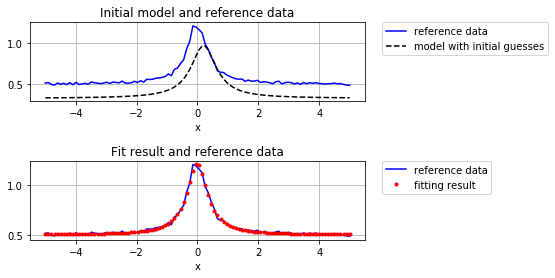

In [7]:
gmodel = Model(QENSmodels.lorentzian) + Model(flat_background)
print('Names of parameters:', gmodel.param_names)
print('Independent variable(s):', gmodel.independent_vars)

initial_parameters_values = [1, 0.2, 0.5, 0.33]

# Fit
result = gmodel.fit(lorentzian_noisy, x=xx, 
                    scale=initial_parameters_values[0], 
                    center=initial_parameters_values[1],
                    hwhm=initial_parameters_values[2],
                    A0=initial_parameters_values[3])

# Plots

# to increase vertical spacing between plots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.75)

# Initial model and reference data
plt.subplot(2, 1, 1)
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, result.init_fit, 'k--', label='model with initial guesses')
plt.xlabel('x')
plt.grid()
plt.title('Initial model and reference data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Fitting result and reference data
plt.subplot(2, 1, 2)
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, result.best_fit, 'r.', label='fitting result')
plt.title('Fit result and reference data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x')
plt.grid()

plt.show()

(<a href='#Table of Contents'>Top</a>)<a id='plotting_results'></a><h2>Plotting results </h2>
using methods implemented in `lmfit`

Result of fit:
 [[Model]]
    (Model(lorentzian) + Model(flat_background))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 100
    # variables        = 4
    chi-square         = 0.01884520
    reduced chi-square = 1.9630e-04
    Akaike info crit   = -849.666705
    Bayesian info crit = -839.246024
[[Variables]]
    hwhm:    0.40981456 +/- 0.00735401 (1.79%) (init = 0.5)
    center: -0.01377928 +/- 0.00453630 (32.92%) (init = 0.2)
    scale:   0.91288748 +/- 0.01318503 (1.44%) (init = 1)
    A0:      0.50144915 +/- 0.00182773 (0.36%) (init = 0.33)
[[Correlations]] (unreported correlations are < 0.100)
    C(hwhm, scale) =  0.787
    C(scale, A0)   = -0.642
    C(hwhm, A0)    = -0.487



(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

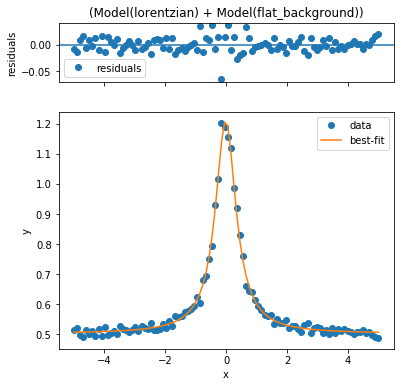

In [8]:
# display result
print('Result of fit:\n',result.fit_report())

# plot
result.plot()